# Chapter 01: exercises

In [102]:
import jax
import numpy as np
import pandas as pd
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = "retina"

## E01
$$
    p(x) = \frac{x^2}{\sqrt{2\pi}}\exp\left(-x^2/2\right)
$$

In [62]:
x = jnp.linspace(-4, 4, 500)

def q(x, vmin=-4, vmax=4):
    y = jnp.ones_like(x)
    return y / (vmax - vmin)

def p(x):
    return x ** 2 / jnp.sqrt(2 * jnp.pi) * jnp.exp(-x ** 2 / 2)


def w(x):
    return p(x) / q(x)

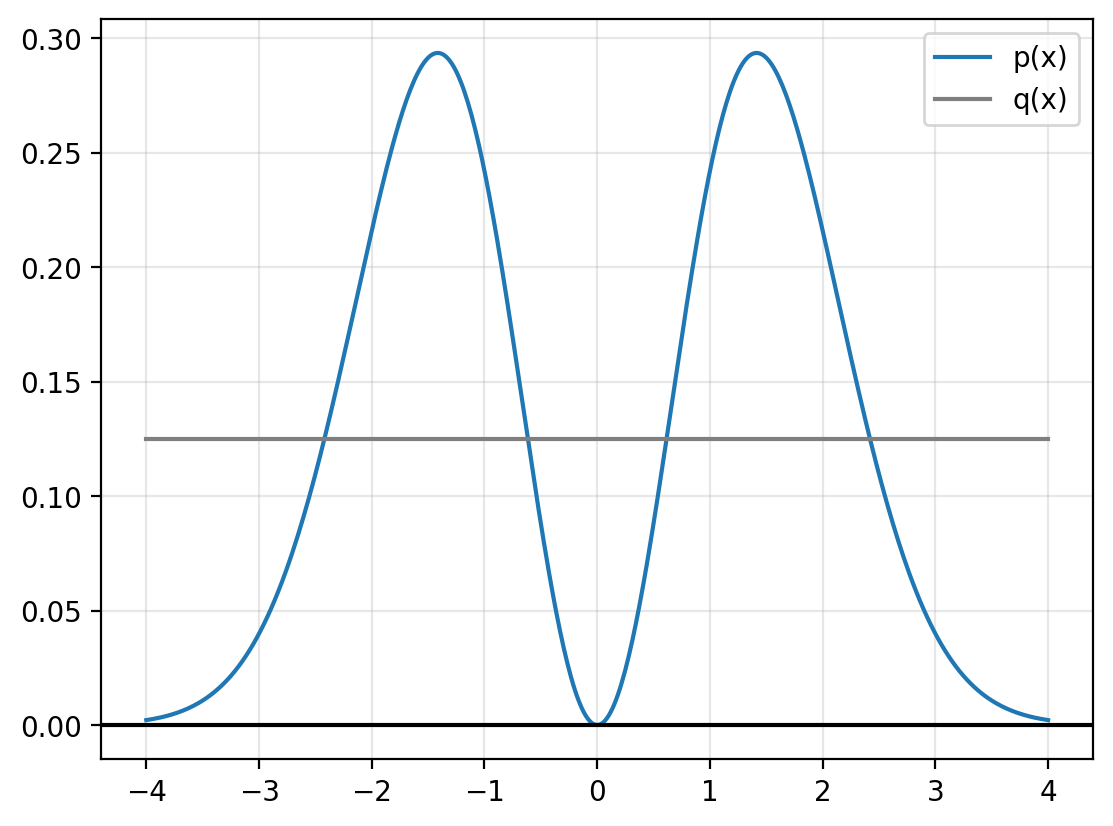

In [63]:
plt.plot(x, p(x), label="p(x)")
plt.plot(x, q(x), c="tab:gray", label="q(x)")
plt.axhline(y=0, c="black")
plt.legend()
plt.grid(alpha=0.3)

**Has density 1?**

<Axes: xlabel='X', ylabel='Density'>

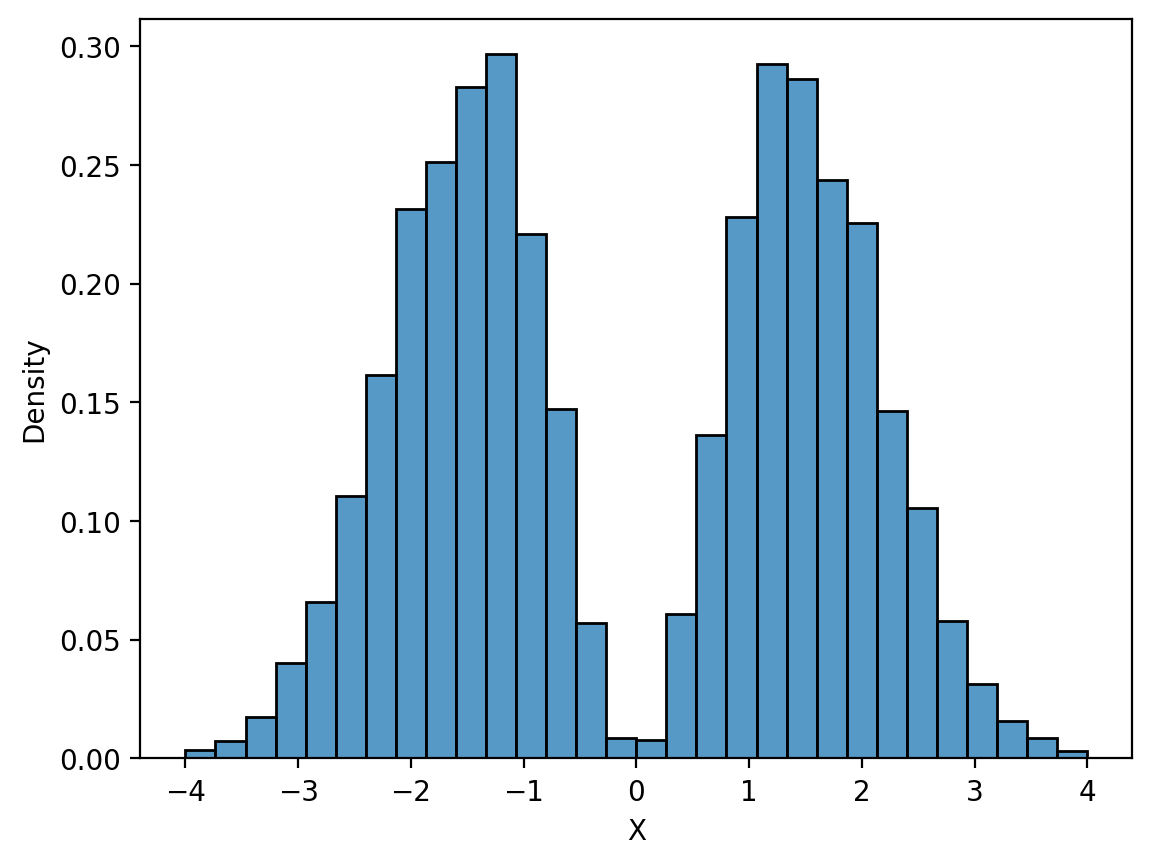

In [99]:
key = jax.random.PRNGKey(314)
n_samples = 10_000
Xq = jax.random.uniform(key, (n_samples,), minval=-4, maxval=4)
weights = w(Xq) / w(Xq).sum()

df = pd.DataFrame({
    "X": np.array(Xq),
    "weights": np.array(weights)
})

sns.histplot(data=df, x="X", weights="weights", bins=30, stat="density")